In [2]:
import numpy as np
from PMM.PMMInverse import PMMI
from PMM.PMMInSitu import PMMInSitu
import os

conf_file = '../confs/conf.yaml'
PPCI = PMMInSitu(conf_file)
print(PPCI.config)

{'array-x': 10, 'array-y': 10, 'serial_ports': {'/dev/tty.usbserial-AB0MNPBN': [76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]}, 'env': {'name': 'ceviche', 'type': 'anaconda'}}
{'array-x': 10, 'array-y': 10, 'serial_ports': {'/dev/tty.usbserial-AB0MNPBN': [76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]}, 'env': {'name': 'ceviche', 'type': 'anaconda'}}


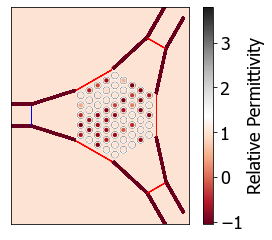

In [1]:
import numpy as np
from PMM.PMMInverse import PMMI
import os

a = 0.020
res = 50
nx = 18
ny = 22
dpml = 2
b_o = 0.0075/a
b_i = 0.0065/a
entrance = 0.04/a
output = os.getcwd()+'/../outputs'
fname = 'Hex5WvgUpUniform'
run_no = ['','']

## Set up domain geometry #####################################################
PPC = PMMI(a, res, nx, ny, dpml) #Initialize PMMI object
PPC.Add_INFOMW_Horn(np.array([6.5, 11]), np.array([1,0]), 6.5, pol ='TM')
PPC.Add_INFOMW_Horn(4*np.array([0.5, 3**0.5/2])+np.array([10.5,11]), np.array([-0.5,-3**0.5/2]), 8, pol ='TM')
PPC.Add_INFOMW_Horn(4*np.array([0.5, -3**0.5/2])+np.array([10.5,11]), np.array([-0.5,3**0.5/2]), 8, pol ='TM')
PPC.Design_Region((6.5, 6.5), (8, 9)) #Specify Region where elements are being optimized

uniform = True
PPC.Rod_Array_Hexagon_train(np.array([10.5,11]), 5, b_i/2**0.5, 1,\
                          a_basis = np.array([[0,1],[np.sqrt(3)/2,1./2]]),\
                          bulbs = True, r_bulb = (b_i, b_o), eps_bulb = 3.8) #Rod ppc array


## Set up Sources and Sim #####################################################
w = 0.33 #Source frequency
wpmax = 0.47
gamma = 0#PPC.gamma(1e9)

ew = 0.048/a/2-0.004/a
hd = 0.089/a
x = np.array([1,0])
y = np.array([0,1])
horn_dir_1 = np.array([0.5,3**0.5/2])
horn_dir_2 = np.array([0.5,-3**0.5/2])
open_dir_1 = np.array([3**0.5/2,-0.5])
open_dir_2 = np.array([3**0.5/2,0.5])
cen = np.array([10.5,11])

PPC.Add_Source(np.array([6.5-hd,11-ew]), np.array([6.5-hd,11+ew]), w, 'src', 'ez')
PPC.Add_Probe((4+hd)*horn_dir_1 + ew*open_dir_1 + cen,\
              (4+hd)*horn_dir_1 - ew*open_dir_1 + cen, w, 'prb1', 'ez')
PPC.Add_Probe((4+hd)*horn_dir_2 + ew*open_dir_2 + cen,\
              (4+hd)*horn_dir_2 - ew*open_dir_2 + cen, w, 'prb2', 'ez')
PPC.Add_Probe(-4.8*(3**0.5/2)*horn_dir_1 + 2.05*open_dir_1 + cen,\
              -4.8*(3**0.5/2)*horn_dir_1 - 2.05*open_dir_1 + cen, w, 'loss_ul', 'ez')
PPC.Add_Probe(-4.8*(3**0.5/2)*horn_dir_2 + 2.05*open_dir_2 + cen,\
              -4.8*(3**0.5/2)*horn_dir_2 - 2.05*open_dir_2 + cen, w, 'loss_ll', 'ez')
PPC.Add_Probe(4.8*(3**0.5/2)*x - 2.05*y + cen,\
              4.8*(3**0.5/2)*x + 2.05*y + cen, w, 'loss_R', 'ez')

#rod_eps = 0.999*np.ones(61) #Rod perm values
#rho = PPC.Eps_to_Rho(epsr = rod_eps, plasma = True, w_src = w, wp_max = wpmax) #Initial Parameters
rho = PPC.Read_Params(output+'/params/'+fname+run_no[0]+'.csv')
#E0 = PPC.Read_Params(output+'/params/'+fname+'_norm_src.csv')
#E0l = PPC.Read_Params(output+'/params/'+fname+'_norm_prb.csv')

PPC.Viz_Domain_opt(rho, savepath = output+'/plots/'+fname+run_no[1]+'_domain.pdf',\
                   w = 0.33, src_names = ['src'], prb_names = ['prb1','prb2','loss_ul','loss_ll','loss_R'],\
                   plasma = True, wp_max = wpmax, uniform = uniform, gamma = gamma)

In [3]:
(4.8*(3**0.5/2)*x + 2.05*y + cen)[0]

14.656921938165304

In [2]:
(4.8*(3**0.5/2)*x - 2.05*y + cen)[0]

14.656921938165304